In [ ]:
#https://universe.roboflow.com/kgx-ix39n/tomato-challenge/dataset/1#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dVXuLdnMV5Yf6F2fLlut")
project = rf.workspace("unicorn-0qv1i").project("tomatoes-detection-opqa4")
dataset = project.version(1).download("yolov8")

clear_output()

In [ ]:
project.classes

{'Late Blight': 483,
 'Spider Mites': 483,
 'Target Spot': 515,
 'Bacterial_Spot': 479,
 'Septoria Leaf Spot': 483,
 'Leaf Mold': 477,
 'Mosaic Virus': 498,
 'Powder Mildew': 610,
 'Early_Blight': 480,
 'Leaf Curl Virus': 500}

In [ ]:
# # ubah fila data.yaml di folder tomato menjadi ini dan jangan lupa di-save
# # pengubahan hanya di bagian path, train, test dan valid

# names:
# - Bacterial Spot
# - Early Blight
# - Healthy
# - Late Blight
# - Leaf Mold
# - Leaf Miner
# - Mosaic Virus
# - Septoria
# - Spider Mites
# - Yellow Leaf Curl Virus
# - Iron Deficiency
# nc: 11
# roboflow:
#   license: CC BY 4.0
#   project: tomato-leaf-disease-rxcft
#   url: https://universe.roboflow.com/universitas-atma-jaya/tomato-leaf-disease-rxcft/dataset/6
#   version: 6
#   workspace: universitas-atma-jaya
# test: ../test/images
# train: ../train/images
# val: ../valid/images
# path: /content/Tomato-Leaf-Disease-6


In [ ]:
!pip install ultralytics==8.0.196 -q

clear_output()

In [ ]:
# silakan tambah epoch nya
!yolo task=detect mode=train data=/content/tomatoes-detection-1/data.yaml conf=.25 epochs=15

100% 6.23M/6.23M [00:00<00:00, 141MB/s]
New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/tomatoes-detection-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False

In [ ]:
# perhatikan output files di folder runs/detect
# perhatikan semua output files di folder runs/detect/train
# from IPython.display import Image
from google.colab.patches import cv2_imshow
import cv2 as cv
import os

res_path = '/content/runs/detect/train'
for i in os.listdir(res_path):
  if i.split('.')[-1].lower() in ['jpg','jpeg','png']:
    img = cv.imread(os.path.join(res_path,i))
    img = cv.resize(img, (540,540))
    cv2_imshow(img)
    print(i)

In [ ]:
# lakukan prediksi salah satu gambar
!yolo task=detect source=/content/tomatoes-detection-1/valid/images/10e35abb-b0a4-4aa2-a533-ab12c7fbe76a___Com-G_TgS_FL-8035_JPG_jpg.rf.4aa2df61fcd57f925adf1d069e4e104f.jpg mode=predict model=/content/runs/detect/train/weights/best.pt show=True save=True conf=.25

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/tomatoes-detection-1/valid/images/10e35abb-b0a4-4aa2-a533-ab12c7fbe76a___Com-G_TgS_FL-8035_JPG_jpg.rf.4aa2df61fcd57f925adf1d069e4e104f.jpg: 640x640 1 Target Spot, 29.3ms
Speed: 3.4ms preprocess, 29.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


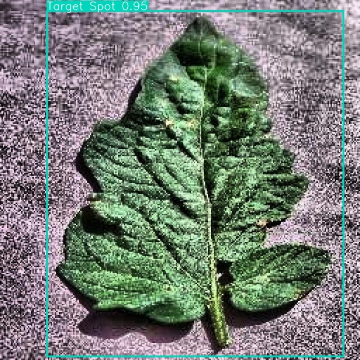

In [ ]:
pred1 = "/content/runs/detect/predict/10e35abb-b0a4-4aa2-a533-ab12c7fbe76a___Com-G_TgS_FL-8035_JPG_jpg.rf.4aa2df61fcd57f925adf1d069e4e104f.jpg"
img = cv.imread(pred1)
img = cv.resize(img, (360,360))
cv2_imshow(img)

In [ ]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 0%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: content/runs/detect/train/train_batch1356.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 3%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 16%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 3%)
  adding: content/runs/detect/train/R_curve.png (deflated 8%)
  adding: content/runs/detect/train/train_batch1355.jpg (deflated 2%)
  adding: content/runs/detect/train/PR_curve.png (

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path="/content/runs/detect/train/")


View the status of your deployment at: https://app.roboflow.com/unicorn-0qv1i/tomatoes-detection-opqa4/1
Share your model with the world at: https://universe.roboflow.com/unicorn-0qv1i/tomatoes-detection-opqa4/model/1
